In [3]:
import pandas as pd

# Load the CSV
df = pd.read_csv("AB_NYC_2019.csv")

# Check first 5 rows
df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Shape of dataset
print("Rows, Columns:", df.shape)

# Column info + datatypes
print(df.info())

# Missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe(include='all'))



Rows, Columns: (48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_

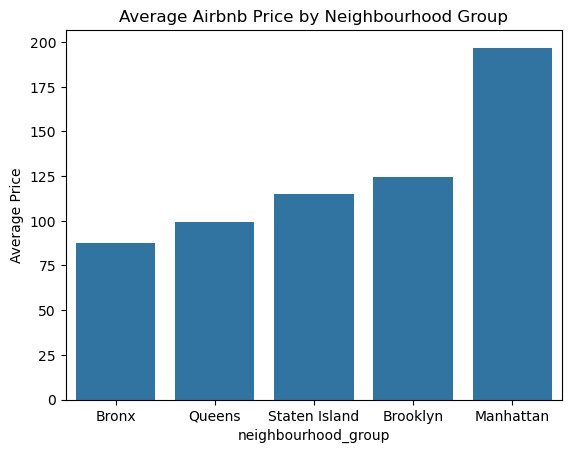

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average price by neighbourhood group (Manhattan, Brooklyn, etc.)
avg_price_group = df.groupby("neighbourhood_group")["price"].mean().sort_values()
sns.barplot(x=avg_price_group.index, y=avg_price_group.values)
plt.title("Average Airbnb Price by Neighbourhood Group")
plt.ylabel("Average Price")
plt.show()


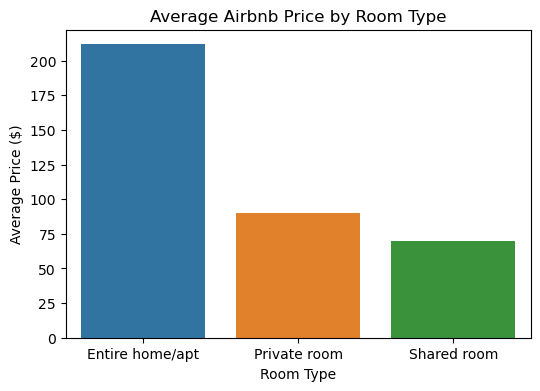

In [10]:
# Average price by room type
plt.figure(figsize=(6,4))
avg_price_room = df.groupby("room_type", as_index=False)["price"].mean()
sns.barplot(data=avg_price_room, x="room_type", y="price", hue="room_type", dodge=False, legend=False)
plt.title("Average Airbnb Price by Room Type")
plt.ylabel("Average Price ($)")
plt.xlabel("Room Type")
plt.show()




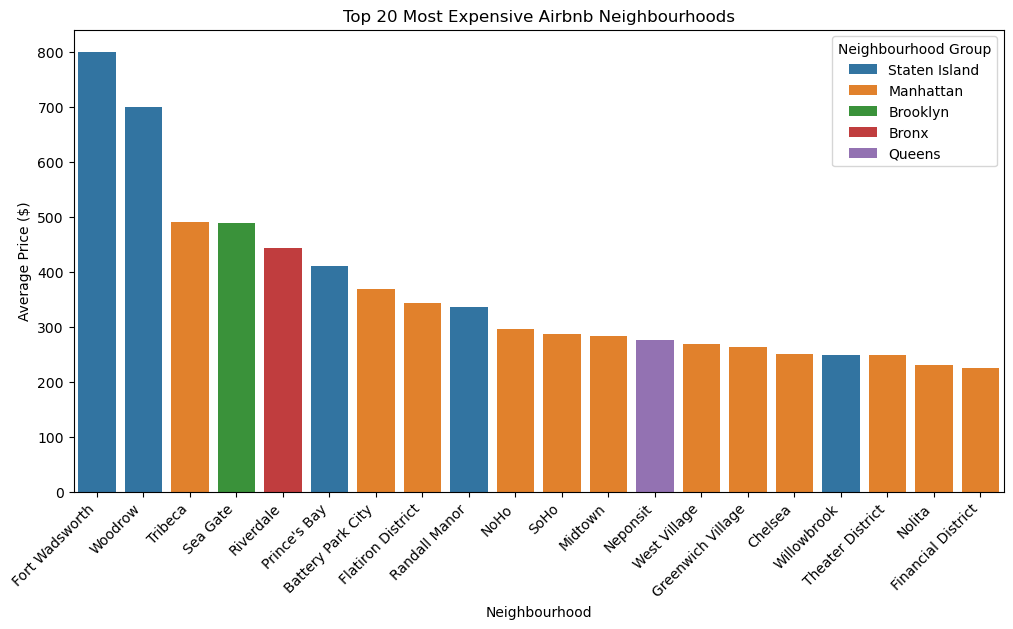

In [11]:
# Top 20 most expensive neighbourhoods
plt.figure(figsize=(12,6))

# Compute average price per neighbourhood
avg_price_neigh = df.groupby(["neighbourhood_group","neighbourhood"], as_index=False)["price"].mean()

# Select top 20 by price
top20 = avg_price_neigh.sort_values("price", ascending=False).head(20)

# Plot
sns.barplot(data=top20, x="neighbourhood", y="price", hue="neighbourhood_group")
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Most Expensive Airbnb Neighbourhoods")
plt.ylabel("Average Price ($)")
plt.xlabel("Neighbourhood")
plt.legend(title="Neighbourhood Group")
plt.show()


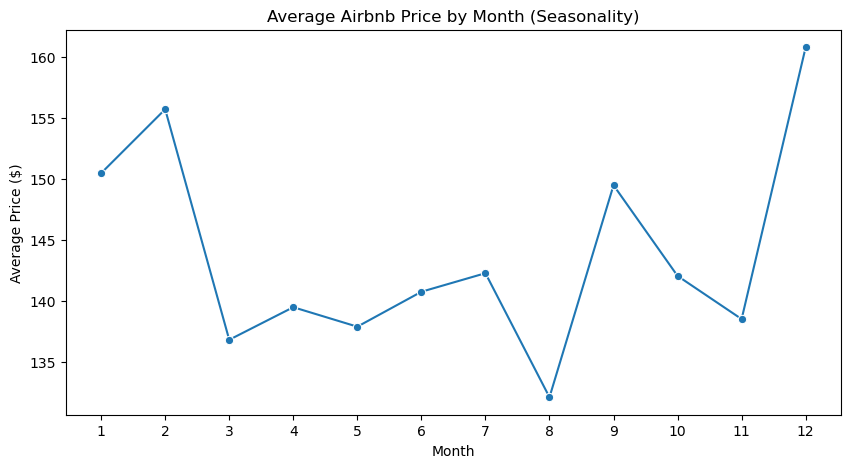

In [12]:
# Seasonality Analysis
import matplotlib.dates as mdates

# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Extract month
df['review_month'] = df['last_review'].dt.month

# Compute average price per month
avg_price_month = df.groupby('review_month')['price'].mean().reset_index()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=avg_price_month, x='review_month', y='price', marker='o')
plt.title("Average Airbnb Price by Month (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Average Price ($)")
plt.xticks(range(1,13))
plt.show()


In [13]:
# Remove price = 0 and top 1% as outliers
df_clean = df[(df['price'] > 0) & (df['price'] < df['price'].quantile(0.99))]

print("Rows after cleaning:", df_clean.shape[0])


Rows after cleaning: 48392


In [15]:
# Cap minimum_nights to 30 safely
df_clean.loc[:, 'minimum_nights'] = df_clean['minimum_nights'].apply(lambda x: x if x <= 30 else 30)


In [16]:
# Check max and some sample values of minimum_nights
print("Max minimum_nights:", df_clean['minimum_nights'].max())
print(df_clean['minimum_nights'].head(10))


Max minimum_nights: 30
0     1
1     1
2     3
3     1
4    10
5     3
6    30
7     2
8     2
9     1
Name: minimum_nights, dtype: int64


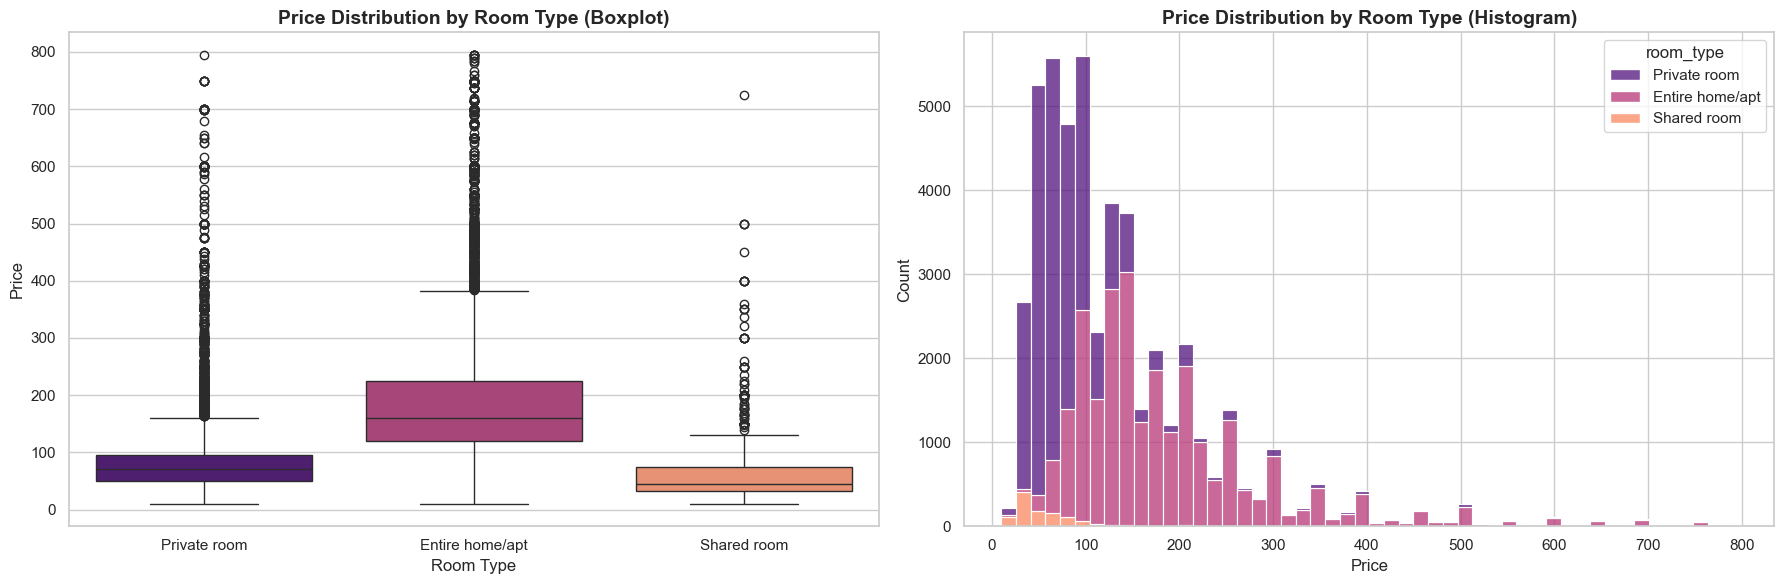

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# ------------------------------
# Block 1: Price Distribution by Room Type (Boxplot)
# ------------------------------
sns.boxplot(data=df_clean, x='room_type', y='price',
            hue='room_type', palette="magma", legend=False, ax=axes[0])
axes[0].set_title("Price Distribution by Room Type (Boxplot)", fontsize=14, weight='bold')
axes[0].set_xlabel("Room Type")
axes[0].set_ylabel("Price")

# ------------------------------
# Block 2: Price Distribution by Room Type (Histogram)
# ------------------------------
sns.histplot(data=df_clean, x="price", hue="room_type",
             multiple="stack", palette="magma", bins=50, ax=axes[1])
axes[1].set_title("Price Distribution by Room Type (Histogram)", fontsize=14, weight='bold')
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()

